In [2]:
from scipy import stats
from numpy.random import binomial
from numpy.random import normal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import t, norm


In [3]:
df = pd.read_csv('data/hour.csv')

In [5]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print('среднее количество аренд за час', df['cnt'].mean())
print('максимальное количество аренд за час', df['cnt'].max())
print('минимальное количество аренд за час', df['cnt'].min())

среднее количество аренд за час 189.46308763450142
максимальное количество аренд за час 977
минимальное количество аренд за час 1


In [9]:
print(df['cnt'].quantile(0.25))
print(df['cnt'].quantile(0.5))
print(df['cnt'].quantile(0.75))

40.0
142.0
281.0


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

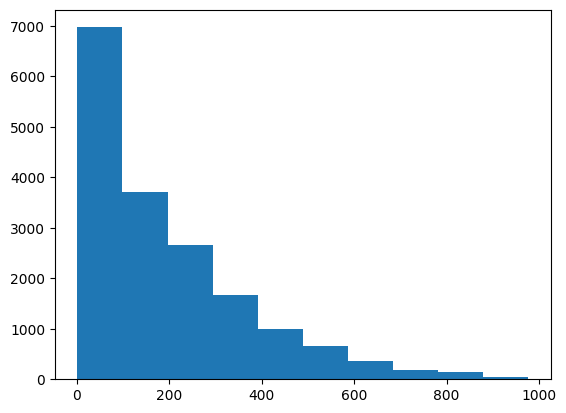

In [10]:
plt.hist(df['cnt'])

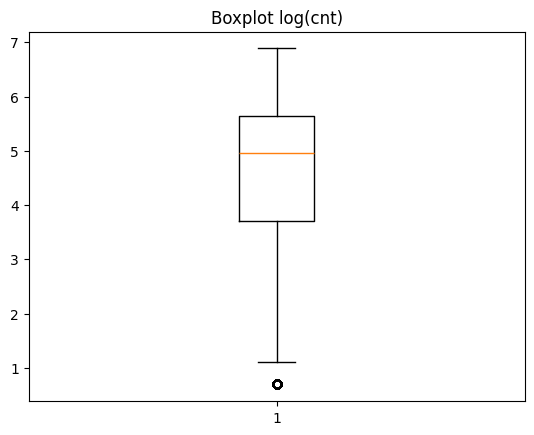

In [11]:
df['log_cnt'] = np.log1p(df['cnt'])
plt.boxplot(df['log_cnt'])
plt.title('Boxplot log(cnt)')
plt.show()


(array([ 366.,  715., 1046., 1021., 1382., 1718., 2792., 4041., 3200.,
        1098.]),
 array([0.69314718, 1.31238343, 1.93161968, 2.55085593, 3.17009218,
        3.78932843, 4.40856467, 5.02780092, 5.64703717, 6.26627342,
        6.88550967]),
 <BarContainer object of 10 artists>)

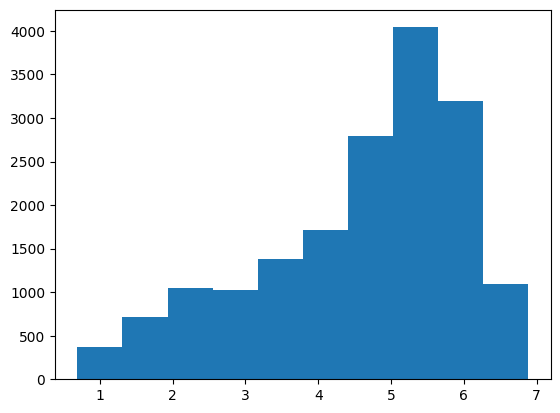

In [12]:
plt.hist(df['log_cnt'])

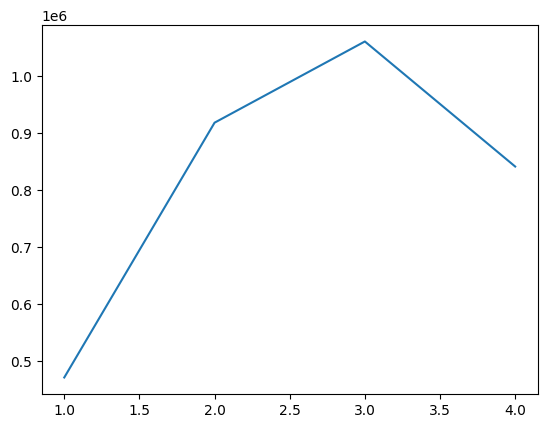

In [13]:
df_posesonam = df.groupby('season', as_index = False)['cnt'].sum()
plt.plot(df_posesonam['season'], df_posesonam['cnt'])

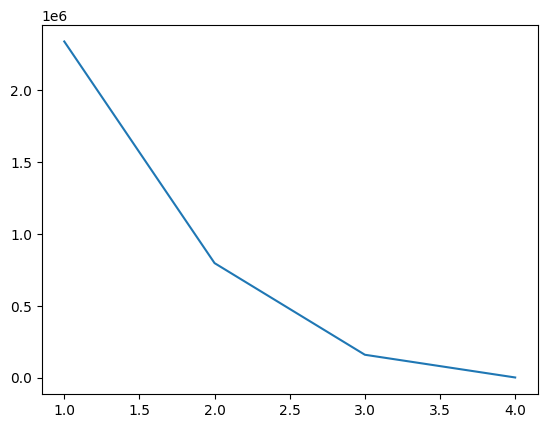

In [14]:
df_pogoda = df.groupby('weathersit', as_index = False)['cnt'].sum()
plt.plot(df_pogoda['weathersit'], df_pogoda['cnt'])

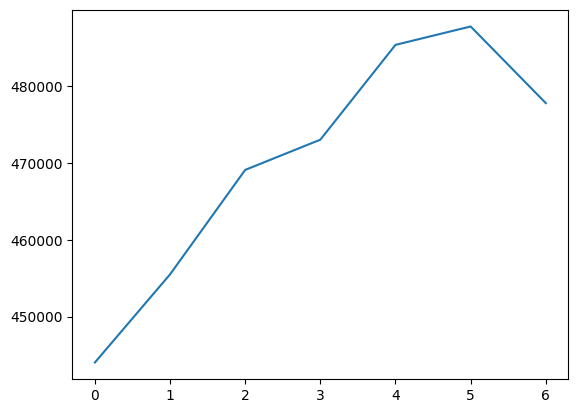

In [15]:
df_dennedeli = df.groupby('weekday', as_index = False)['cnt'].sum()
plt.plot(df_dennedeli['weekday'], df_dennedeli['cnt'])

In [16]:
cols = [
    'cnt',
    'temp',
    'hum',
    'windspeed',
    'casual',
    'registered',
    'yr'
]

corr = df[cols].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f'
)
plt.title('Корреляция (выбранные признаки)')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])


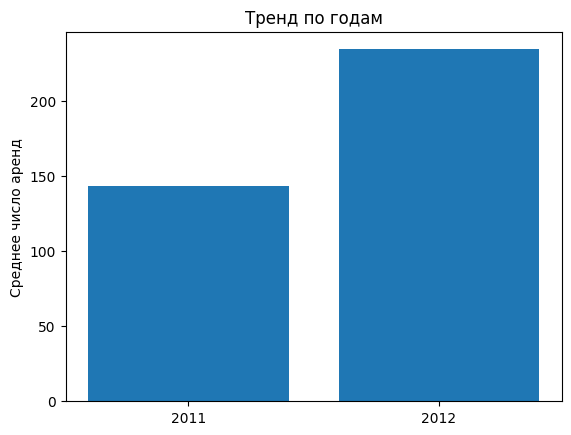

In [ ]:
cnt_by_year = df.groupby('yr')['cnt'].mean()

plt.bar(cnt_by_year.index, cnt_by_year.values)
plt.xticks([0, 1], ['2011', '2012'])
plt.ylabel('Среднее число аренд')
plt.title('Тренд по годам')
plt.show()


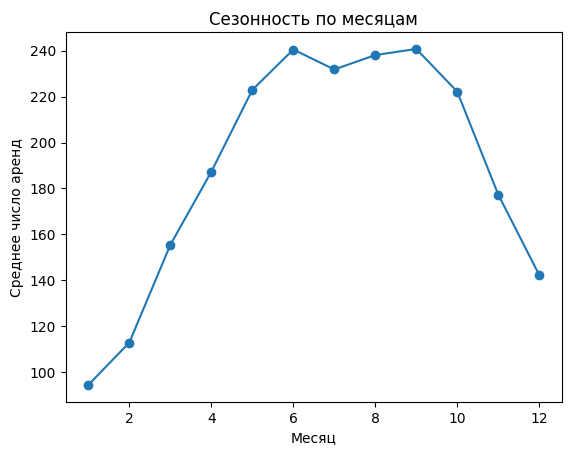

In [ ]:
cnt_by_month = df.groupby('mnth')['cnt'].mean()

plt.plot(cnt_by_month.index, cnt_by_month.values, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Среднее число аренд')
plt.title('Сезонность по месяцам')
plt.show()


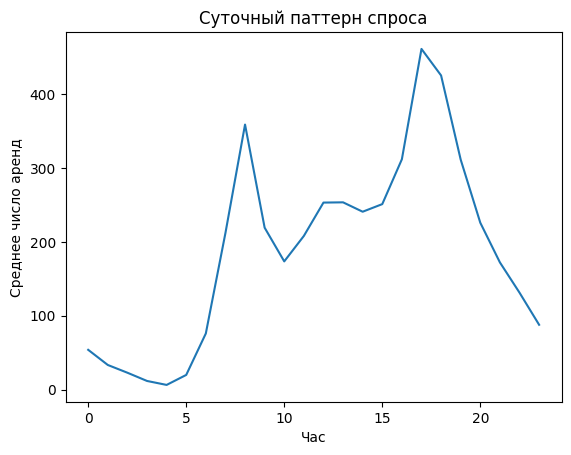

In [17]:
cnt_by_hour = df.groupby('hr')['cnt'].mean()

plt.plot(cnt_by_hour.index, cnt_by_hour.values)
plt.xlabel('Час')
plt.ylabel('Среднее число аренд')
plt.title('Суточный паттерн спроса')
plt.show()


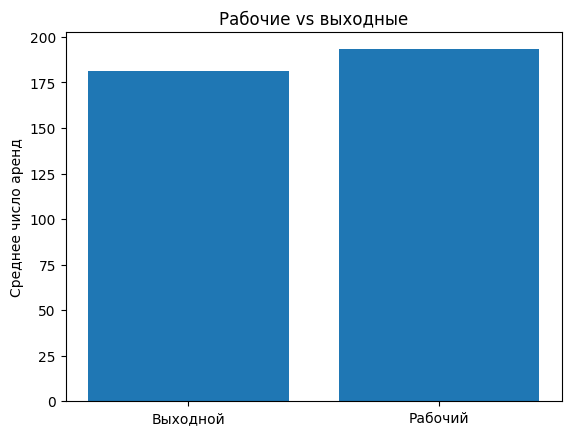

In [18]:
cnt_working = df.groupby('workingday')['cnt'].mean()

plt.bar(['Выходной', 'Рабочий'], cnt_working.values)
plt.ylabel('Среднее число аренд')
plt.title('Рабочие vs выходные')
plt.show()


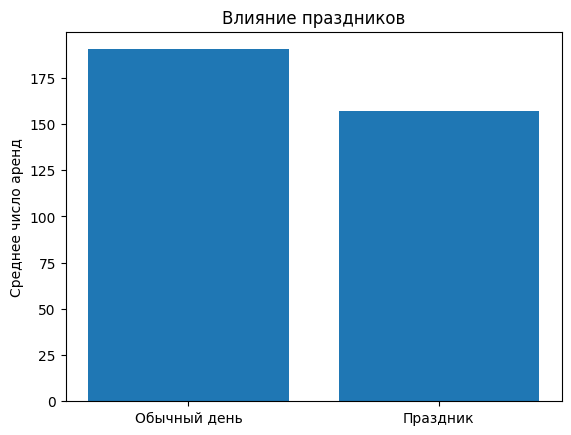

In [19]:
cnt_holiday = df.groupby('holiday')['cnt'].mean()

plt.bar(['Обычный день', 'Праздник'], cnt_holiday.values)
plt.ylabel('Среднее число аренд')
plt.title('Влияние праздников')
plt.show()


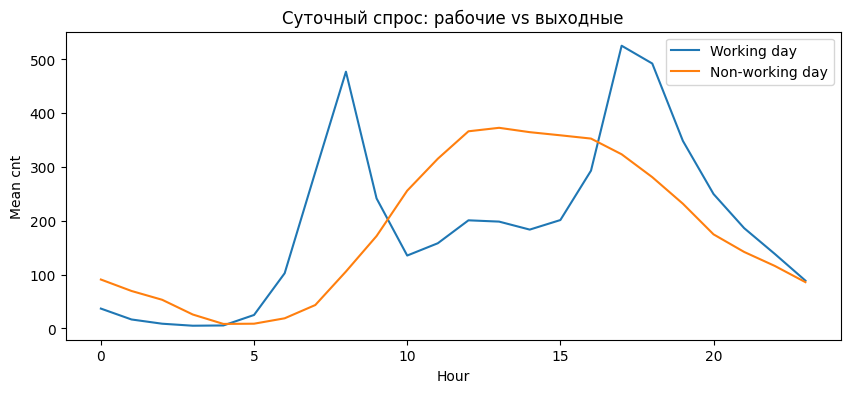

In [20]:
cnt_hour_work = df[df['workingday'] == 1].groupby('hr')['cnt'].mean()
cnt_hour_free = df[df['workingday'] == 0].groupby('hr')['cnt'].mean()

plt.figure(figsize=(10,4))
plt.plot(cnt_hour_work.index, cnt_hour_work.values, label='Working day')
plt.plot(cnt_hour_free.index, cnt_hour_free.values, label='Non-working day')
plt.xlabel('Hour')
plt.ylabel('Mean cnt')
plt.title('Суточный спрос: рабочие vs выходные')
plt.legend()
plt.show()


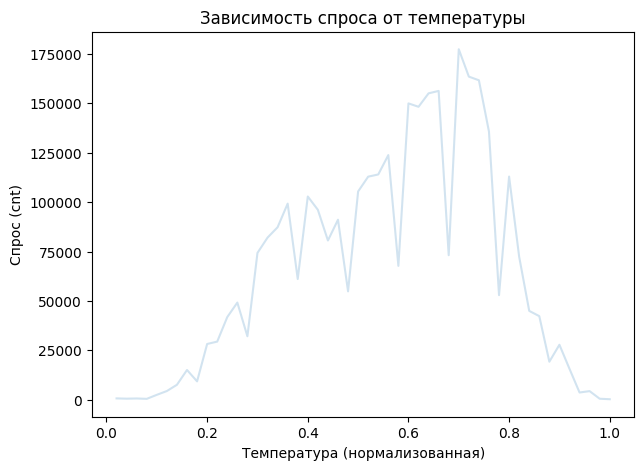

In [23]:
plt.figure(figsize=(7,5))
df_temp = df.groupby('temp', as_index = False)['cnt'].sum()
plt.plot(df_temp['temp'], df_temp['cnt'], alpha=0.2)
plt.xlabel('Температура (нормализованная)')
plt.ylabel('Спрос (cnt)')
plt.title('Зависимость спроса от температуры')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22844\3406235526.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('temp_bin')['cnt'].mean().plot(


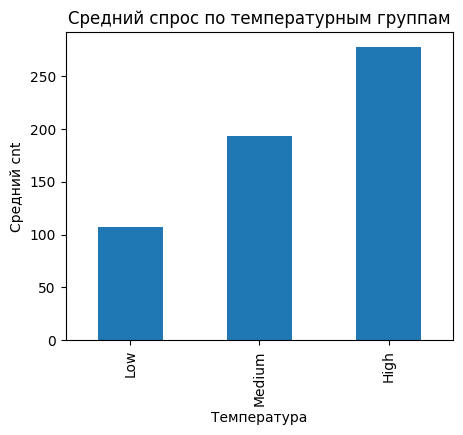

In [26]:
df['temp_bin'] = pd.qcut(
    df['temp'],
    q=3,
    labels=['Low', 'Medium', 'High']
)
df.groupby('temp_bin')['cnt'].mean().plot(
    kind='bar',
    figsize=(5,4)
)
plt.title('Средний спрос по температурным группам')
plt.xlabel('Температура')
plt.ylabel('Средний cnt')
plt.show()
